In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_sept = pd.read_csv('2020-citibike-tripdata/9_September/202009-citibike-tripdata_1.csv',\
                 usecols=['starttime','start station id','stoptime','end station id','bikeid'],\
                 parse_dates=['starttime','stoptime'])

In [4]:
df_sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   starttime         1000000 non-null  datetime64[ns]
 1   stoptime          1000000 non-null  datetime64[ns]
 2   start station id  1000000 non-null  int64         
 3   end station id    1000000 non-null  int64         
 4   bikeid            1000000 non-null  int64         
dtypes: datetime64[ns](2), int64(3)
memory usage: 38.1 MB


Find bikes that were moved from one station to another without a ride in trip data

In [5]:
dfbike=df_sept.sort_values(by=['bikeid','starttime'])
dfbike.head(10)

,starttime,stoptime,start station id,end station id,bikeid
15101,2020-09-01 10:47:30.108,2020-09-01 10:54:27.793,284,388,14529
49062,2020-09-01 17:55:27.418,2020-09-01 18:30:47.464,388,480,14529
54963,2020-09-01 18:33:00.474,2020-09-01 18:56:19.674,480,284,14529
59248,2020-09-01 19:02:14.153,2020-09-01 19:06:24.328,284,336,14529
74846,2020-09-01 22:47:55.442,2020-09-01 22:52:29.530,336,247,14529
89097,2020-09-02 11:10:19.996,2020-09-02 11:28:45.866,247,229,14529
91012,2020-09-02 11:52:11.166,2020-09-02 11:56:29.728,229,229,14529
142109,2020-09-02 21:31:39.126,2020-09-02 21:42:00.724,229,445,14529
151933,2020-09-03 07:39:42.757,2020-09-03 07:44:41.909,445,3263,14529
153821,2020-09-03 08:09:26.875,2020-09-03 08:14:59.110,3263,432,14529


The end station id of one ride is (almost) always the start station id of the next ride.



In [6]:
offset = pd.DataFrame({'starttime': pd.to_datetime('2010-09-01'),\
  'start station id':0,'stoptime': pd.to_datetime('2010-09-01'),\
  'end station id':0,'bikeid':0},index=[0])

Create two new data frames dfbike1 with the offset first, dfbike2 with the offset last

In [7]:
dfbike1 = pd.concat([offset,dfbike]).reset_index(drop=True)
dfbike2 = pd.concat([dfbike,offset]).reset_index(drop=True)

In [11]:
dfbike2.head()

,starttime,stoptime,start station id,end station id,bikeid
0,2020-09-01 10:47:30.108,2020-09-01 10:54:27.793,284,388,14529
1,2020-09-01 17:55:27.418,2020-09-01 18:30:47.464,388,480,14529
2,2020-09-01 18:33:00.474,2020-09-01 18:56:19.674,480,284,14529
3,2020-09-01 19:02:14.153,2020-09-01 19:06:24.328,284,336,14529
4,2020-09-01 22:47:55.442,2020-09-01 22:52:29.530,336,247,14529


In [14]:
dfbike = pd.concat ([dfbike1[['bikeid','stoptime','end station id']]\
                   ,dfbike2[['bikeid','starttime','start station id']] ],\
                    axis=1 )

In [15]:
dfbike.head()

,bikeid,stoptime,end station id,bikeid,starttime,start station id
0,0,2010-09-01 00:00:00.000,0,14529,2020-09-01 10:47:30.108,284
1,14529,2020-09-01 10:54:27.793,388,14529,2020-09-01 17:55:27.418,388
2,14529,2020-09-01 18:30:47.464,480,14529,2020-09-01 18:33:00.474,480
3,14529,2020-09-01 18:56:19.674,284,14529,2020-09-01 19:02:14.153,284
4,14529,2020-09-01 19:06:24.328,336,14529,2020-09-01 22:47:55.442,336


Now each row shows the end of one trip and the start of the next.
This is the time the bike spends at the station between rides.

In [16]:
dfbike[55:65]

,bikeid,stoptime,end station id,bikeid,starttime,start station id
55,14529,2020-09-09 19:32:50.351,470,14529,2020-09-09 21:32:11.784,470
56,14529,2020-09-09 21:53:22.438,410,14529,2020-09-10 16:40:28.520,410
57,14529,2020-09-10 16:51:49.008,335,14529,2020-09-10 17:40:04.686,335
58,14529,2020-09-10 18:10:18.032,3812,14529,2020-09-10 18:19:07.074,3812
59,14529,2020-09-10 18:21:12.921,3812,14529,2020-09-11 13:25:40.381,3812
60,14529,2020-09-11 13:52:09.488,3906,14529,2020-09-12 15:44:36.348,4123
61,14529,2020-09-12 16:08:25.391,499,14529,2020-09-12 16:16:40.668,499
62,14529,2020-09-12 16:28:31.910,305,14529,2020-09-12 16:52:58.746,305
63,14529,2020-09-12 16:59:35.428,3815,14529,2020-09-12 17:02:37.739,3815
64,14529,2020-09-12 17:17:34.892,265,14529,2020-09-12 17:51:13.908,265


60 shows that bike was out for "rebalancing" as the end station id is not equal to start station id 

In [17]:
#Rename columns

dfbike.columns = ['bikeid1','starttime','start station id','bikeid2','stoptime','end station id'] 

In [18]:
dfrebal = dfbike[['starttime','start station id','stoptime','end station id']].\
      loc[(dfbike.bikeid1==dfbike.bikeid2) & (dfbike['start station id'] != dfbike['end station id']) ] 

In [19]:
dfrebal.head()

,starttime,start station id,stoptime,end station id
60,2020-09-11 13:52:09.488,3906,2020-09-12 15:44:36.348,4123
80,2020-09-05 13:17:07.343,3762,2020-09-06 16:40:22.864,3637
100,2020-09-03 12:04:03.602,3744,2020-09-03 14:41:22.388,501
181,2020-09-09 18:00:32.456,530,2020-09-10 16:30:35.070,422
242,2020-09-03 07:59:47.844,3918,2020-09-04 09:41:51.984,476


In [20]:
dfrebal.reset_index(drop=True, inplace=True)
dfrebal

,starttime,start station id,stoptime,end station id
0,2020-09-11 13:52:09.488,3906,2020-09-12 15:44:36.348,4123
1,2020-09-05 13:17:07.343,3762,2020-09-06 16:40:22.864,3637
2,2020-09-03 12:04:03.602,3744,2020-09-03 14:41:22.388,501
3,2020-09-09 18:00:32.456,530,2020-09-10 16:30:35.070,422
4,2020-09-03 07:59:47.844,3918,2020-09-04 09:41:51.984,476
...,...,...,...,...
15507,2020-09-10 19:40:14.353,315,2020-09-11 07:05:11.424,3919
15508,2020-09-09 14:23:29.105,499,2020-09-09 14:55:59.605,3292
15509,2020-09-11 20:33:14.241,3604,2020-09-12 11:55:44.650,3364
15510,2020-09-08 20:09:28.496,3161,2020-09-09 07:09:10.916,3170


In [21]:
dfrebal.to_parquet('202009-citibike-reblance.parquet')

In [22]:
dfstations = pd.read_csv('2020-citibike-tripdata/9_September/202009-citibike-tripdata_1.csv',\
                 usecols=['start station id','start station name']).drop_duplicates()
                
dfstations.columns=['stationid','station name']

dfstations.set_index('stationid',drop=True, inplace=True)

In [23]:
dfstations

,station name
stationid,
3508,St Nicholas Ave & Manhattan Ave
3621,27 Ave & 9 St
3492,E 118 St & Park Ave
3946,St Nicholas Ave & W 137 St
3081,Graham Ave & Grand St
...,...
4147,E 163 St & Tiffany St
4166,River Ave & E 153 St
4105,Concourse Village West & E 156 St


In [24]:
dfrebal = pd.merge(dfrebal, dfstations['station name'], how = 'left',\
               left_on='start station id', right_on='stationid')
dfrebal = pd.merge(dfrebal, dfstations['station name'], how = 'left',\
               left_on='end station id', right_on='stationid')

In [25]:
dfrebal.head()

,starttime,start station id,stoptime,end station id,station name_x,station name_y
0,2020-09-11 13:52:09.488,3906,2020-09-12 15:44:36.348,4123,West St & Liberty St,Central Park W & W 103 St
1,2020-09-05 13:17:07.343,3762,2020-09-06 16:40:22.864,3637,3 Ave & Carroll St,Fulton St & Waverly Ave
2,2020-09-03 12:04:03.602,3744,2020-09-03 14:41:22.388,501,1 Ave & E 5 St,FDR Drive & E 35 St
3,2020-09-09 18:00:32.456,530,2020-09-10 16:30:35.070,422,11 Ave & W 59 St,W 59 St & 10 Ave
4,2020-09-03 07:59:47.844,3918,2020-09-04 09:41:51.984,476,Avenue D & E 8 St,E 31 St & 3 Ave


In [26]:

dfrebal.rename(columns = 
        {'station name_x':'start station name','station name_y':'end station name'}, inplace = True)

In [27]:
rebalout = dfrebal['start station name'].astype('str').value_counts()[:20]

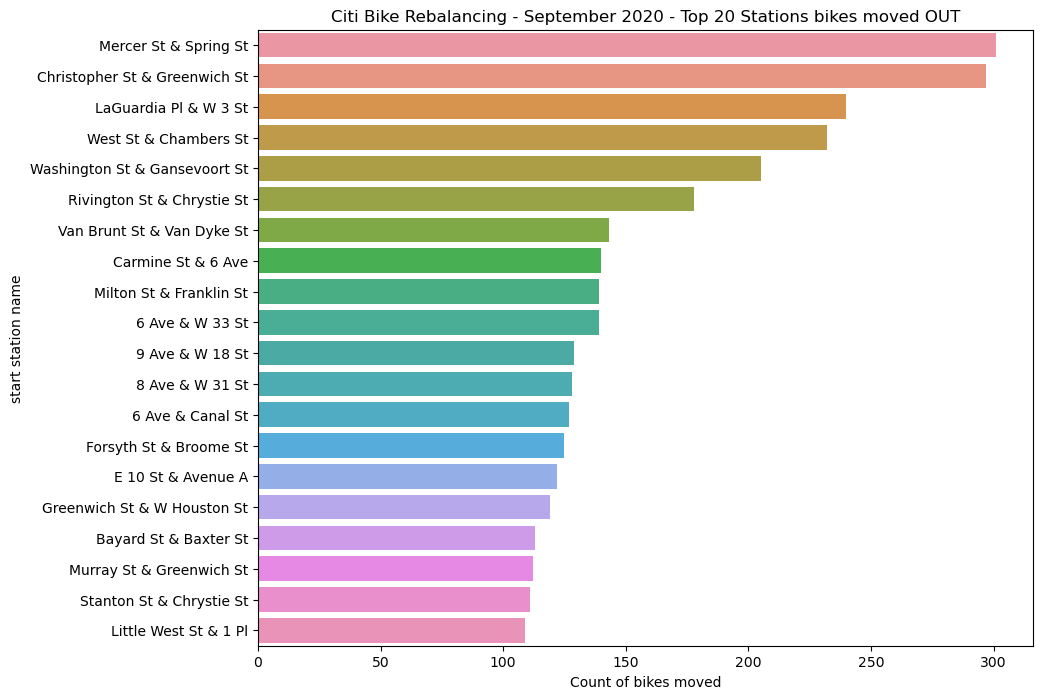

In [28]:
plt.figure(figsize=(10,8))
plt.title('Citi Bike Rebalancing - September 2020 - Top 20 Stations bikes moved OUT'  ) 
plt.xlabel('Count of bikes moved') 
sns.barplot( x=rebalout.values, y=rebalout.index,  orient="h" ) ;

In [29]:
rebalin = dfrebal['end station name'].value_counts()[:20]

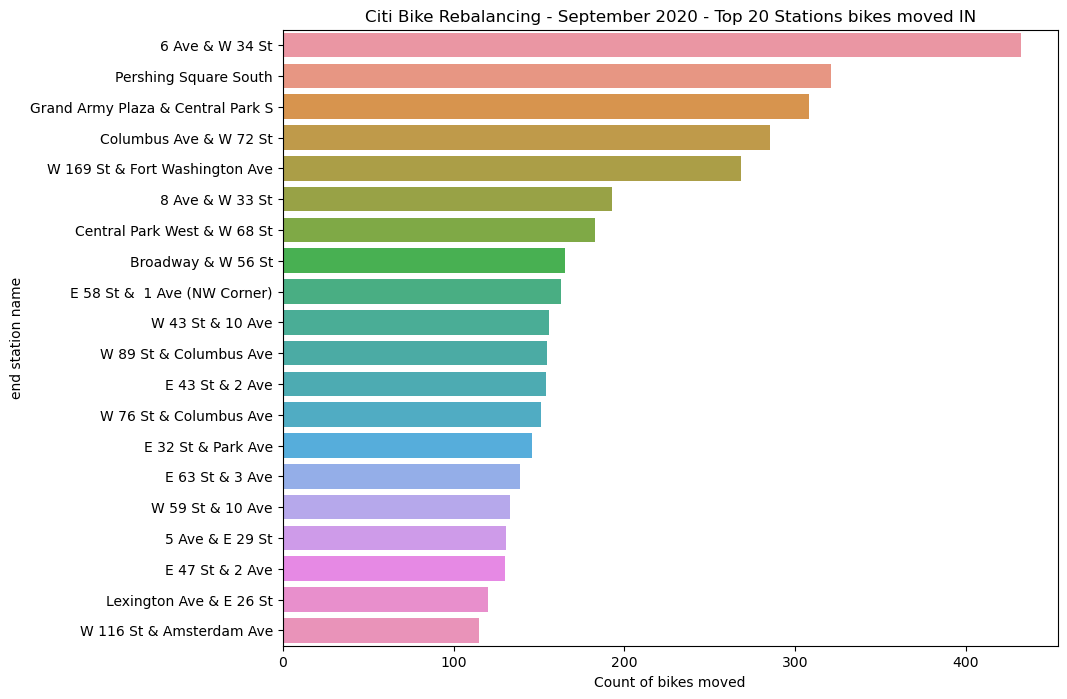

In [30]:
plt.figure(figsize=(10,8))
plt.title('Citi Bike Rebalancing - September 2020 - Top 20 Stations bikes moved IN'  ) 
plt.xlabel('Count of bikes moved') 
sns.barplot( x=rebalin.values , y=rebalin.index,  orient="h"  ) ;